In [5]:
from os import path
import matplotlib as mpl
%load_ext autoreload
%autoreload 2
mpl.rcParams['figure.facecolor'] = 'white'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from CellModels.Clustering.Data import HarmonizedClusteringResult
from CellModels.Clustering.Figures import GeneClusteringPlot, MultiClusteringPlot
from CellModels.Clustering.IO import MultiClusteringReader

In [3]:
sample_dir = path.expanduser(
    '~/Google Drive File Stream/My Drive/Projects/RDN-WDP/new-clustering/single-gene')
gene = 'Abl'
mf = MultiClusteringReader.read(sample_dir, gene)

Missing clusters! Regularizing...
Missing clusters! Regularizing...


/Users/rejsmont/PycharmProjects/rdn-wdp-python/analysis/CellModels/Cells/Figures.py:23: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self._fig.show()
/Users/rejsmont/PycharmProjects/rdn-wdp-python/analysis/CellModels/Cells/Figures.py:23: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self._fig.show()


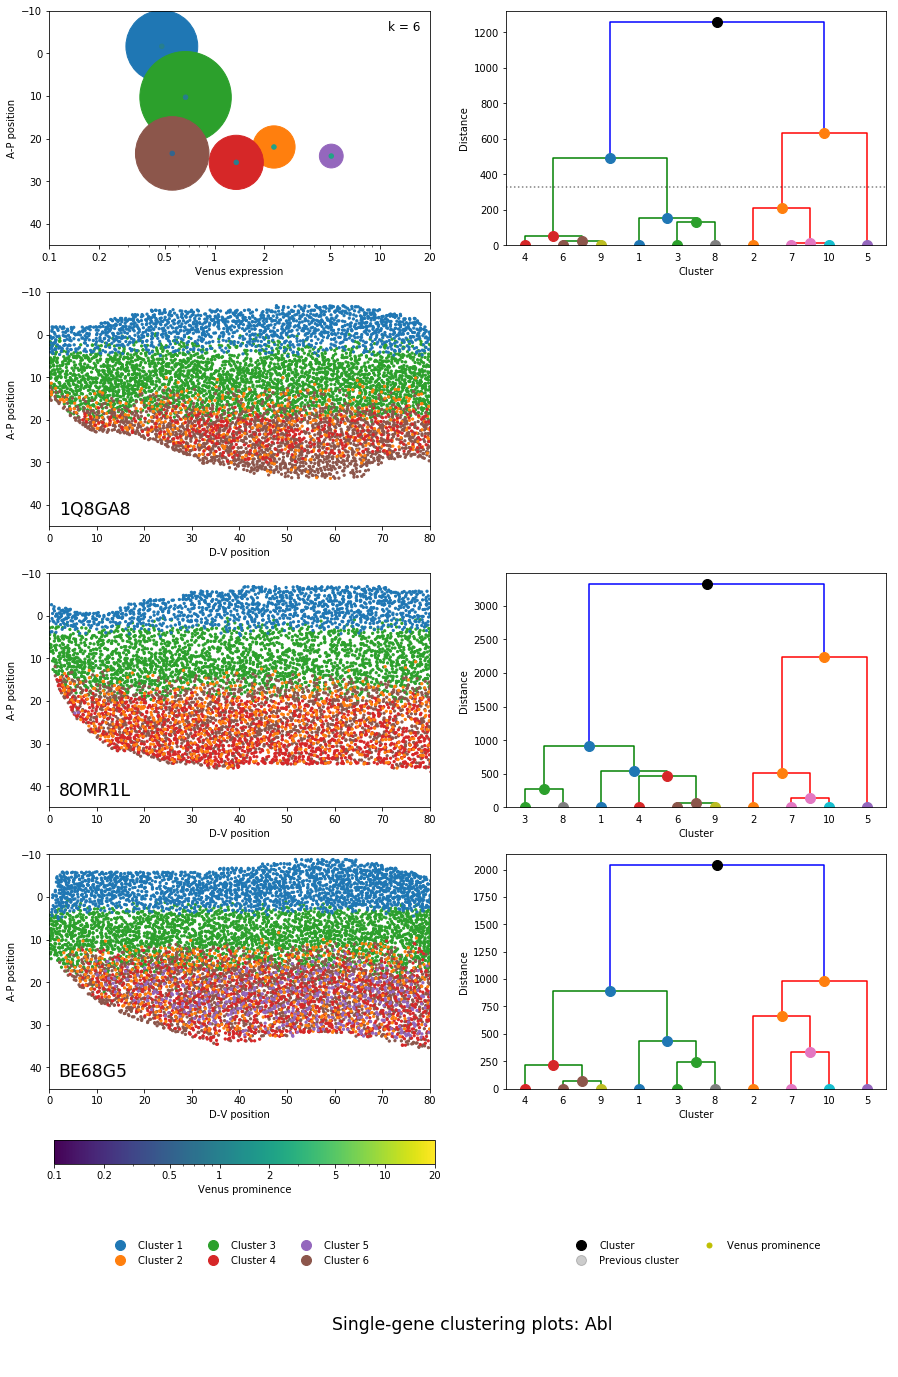

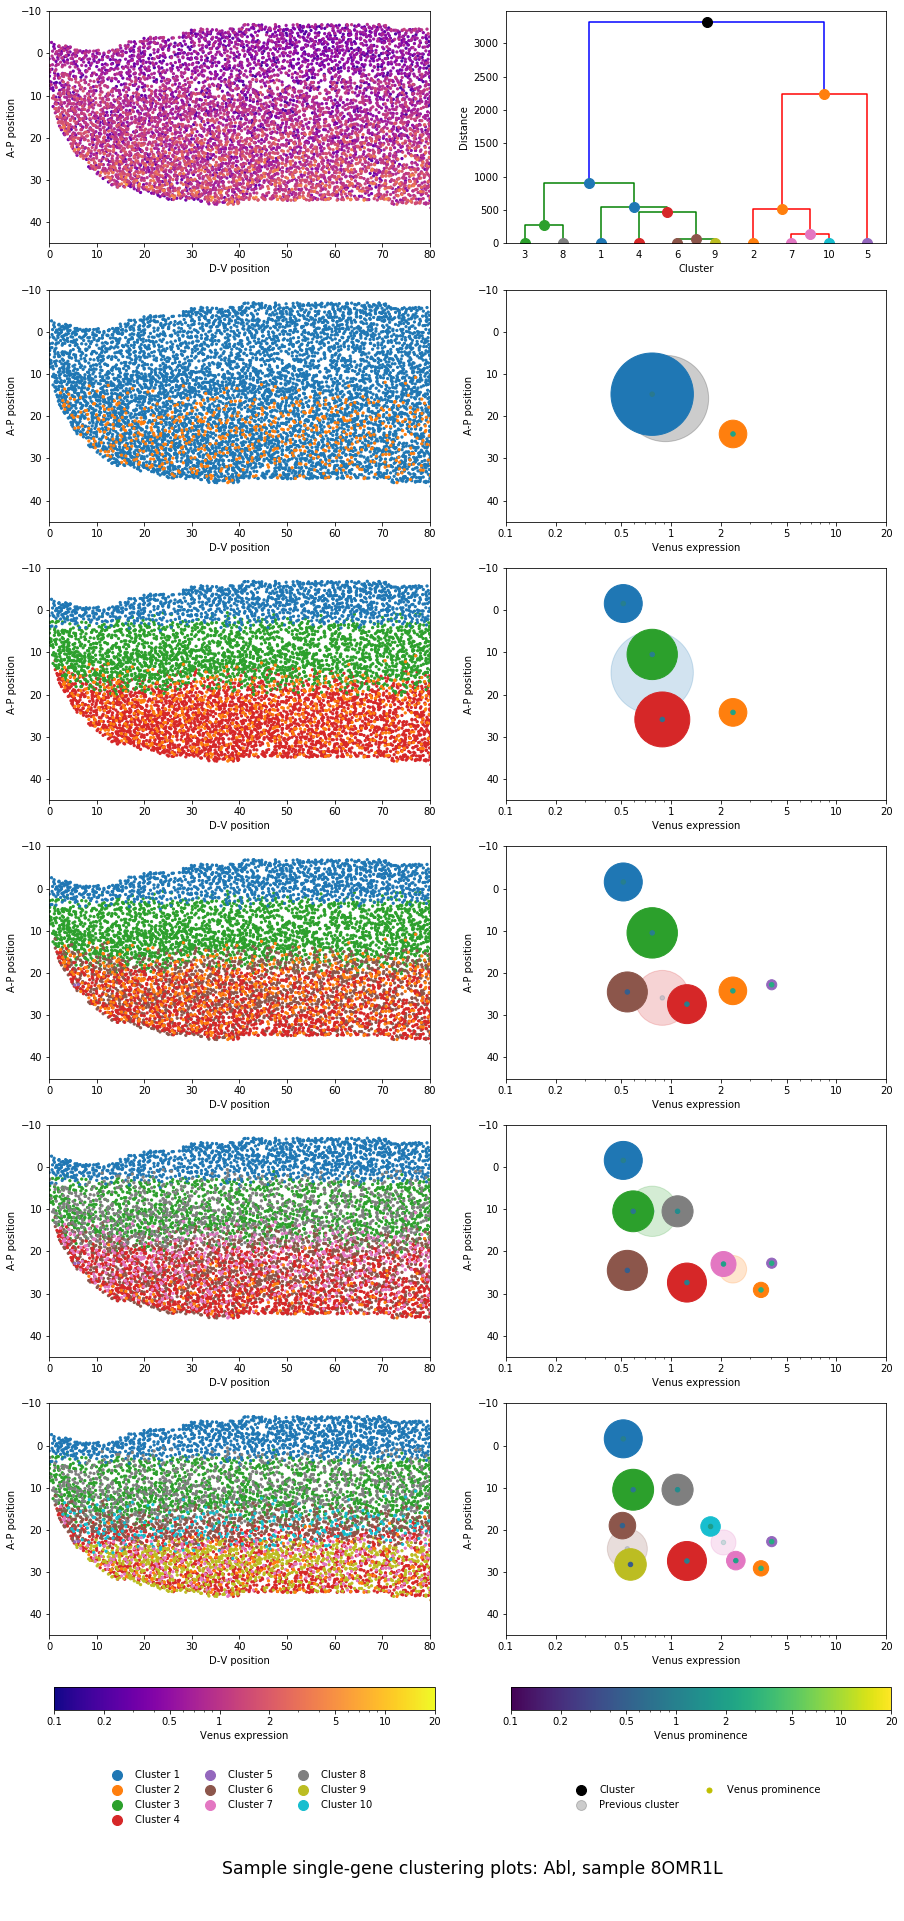

In [6]:
hf = HarmonizedClusteringResult(mf)

fig = GeneClusteringPlot(hf)
fig.show()

fig = MultiClusteringPlot(hf, 'best')
fig.show()

In [24]:
import pandas as pd
from IPython.core.display import display

idx = pd.IndexSlice
missing = '1Q8GA8'
perfect = '8OMR1L'
cells = hf.cells.loc[idx[:, missing], :]

t = hf._cluster_table(cells)
c = hf._cluster_columns(cells)

display(t)

for i in range(len(c) - 1):
    cur = c[i]
    nxt = c[i+1]
    u = t[t[cur] != t[nxt]]
    n = t.groupby(cur).size()
    f = (n.index.isin(u[cur])) & (n == 1)
    for v in n[f].index:
        print(cur, v)
        t.loc[t[cur] == v, nxt] = v

display(t)

Missing clusters! Regularizing...
('Cluster', 'ward', 8) 7.0


Cluster                     
     ward                     
       2    4    6    8     10
0     1.0  1.0  1.0  1.0   1.0
1     1.0  3.0  3.0  3.0   3.0
2     1.0  3.0  3.0  8.0   8.0
3     1.0  4.0  4.0  4.0   4.0
4     1.0  4.0  6.0  6.0   6.0
5     1.0  4.0  6.0  6.0   9.0
6     2.0  2.0  2.0  2.0   2.0
7     2.0  2.0  2.0  7.0  10.0

Cluster                    
     ward                    
       2    4    6    8    10
0     1.0  1.0  1.0  1.0  1.0
1     1.0  3.0  3.0  3.0  3.0
2     1.0  3.0  3.0  8.0  8.0
3     1.0  4.0  4.0  4.0  4.0
4     1.0  4.0  6.0  6.0  6.0
5     1.0  4.0  6.0  6.0  9.0
6     2.0  2.0  2.0  2.0  2.0
7     2.0  2.0  2.0  7.0  7.0

In [20]:
#l = hf.linkage(cells, hf.config.rf_features)
#l


